In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
urls = ['https://en.wikipedia.org/wiki/List_of_highest-grossing_superhero_films',
       'https://en.wikipedia.org/wiki/List_of_highest-grossing_sports_films',
       'https://en.wikipedia.org/wiki/List_of_highest-grossing_animated_films']
def scrape_website(url):
    html_content = requests.get(url)
    soup = BeautifulSoup(html_content.content, "html.parser")
    count = 0
#print(soup.prettify())
# 'find_all' function brings back all instances of the 'table' tag in the HTML and stores it in 'all_tables' variable
    all_tables=soup.find_all("table")
#print(all_tables)
    right_table = soup.find('table', class_='wikitable')
#THIS GETS RID OF ALL THE superscripts and references in the wikitable
    for tag in soup.find_all(class_="reference"):
        tag.decompose()
#print(right_table)
#Create lists for as many columns in the table
    rank = []
    film = []
    worldwide_gross = []
#print(right_table.findAll('tr'))
    for row in right_table.findAll('tr'):
        cells=row.findAll('td')
    #print(cells)
        cells1 = row.findAll('a')
    #print(cells1)
    #print(len(cells))
    #each of these websites use a different html formatting, so I have to adjust the code every time
    #for some reason this code also runs with the superhero URL
        if len(cells) == 7 or len(cells) == 6 or len(cells) == 5 or len(cells) == 4 and url == 'https://en.wikipedia.org/wiki/List_of_highest-grossing_sports_films':
        #elif len(cells) == 7 or len(cells) == 4 and url == 'https://en.wikipedia.org/wiki/List_of_highest-grossing_sports_films':
            #print(len(cells))
            count +=1
            #print(count)
            rank.append(count)  
            film.append(cells1[0].get_text().rstrip("\n"))
            worldwide_gross.append(cells[2].get_text().rstrip("\n"))
        elif len(cells) == 7 or len(cells) == 6 or len(cells) == 5 or len(cells) == 4 and url == 'https://en.wikipedia.org/wiki/List_of_highest-grossing_animated_films':
            rank.append(cells[0].get_text().rstrip("\n"))  
            worldwide_gross.append(cells[1].get_text().rstrip("\n"))
            film.append(cells1[0].get_text().rstrip("\n"))
    df=pd.DataFrame()
    df['Rank'] = rank
    df['Film']  = film
    df['Worldwide Gross'] = worldwide_gross
    return df
def convert_to_float(l):
    l = [float(i) for i in l]
    return l
superhero_films = scrape_website('https://en.wikipedia.org/wiki/List_of_highest-grossing_superhero_films')
#superhero_films
#print(superhero_films)
sports_films = scrape_website('https://en.wikipedia.org/wiki/List_of_highest-grossing_sports_films')   
#print(anime_films)
#anime_films
animated_films = scrape_website('https://en.wikipedia.org/wiki/List_of_highest-grossing_animated_films')  
#animated_films
frames = []
films_df = [superhero_films, sports_films, animated_films]
for i in films_df:
    frames.append(i)
    combined_films = pd.concat(frames)
combined_films

,Rank,Film,Worldwide Gross
0,1,Avengers: Endgame,"$2,797,800,564"
1,2,Avengers: Infinity War,"$2,048,359,754"
2,3,The Avengers,"$1,518,812,988"
3,4,Avengers: Age of Ultron,"$1,405,403,694"
4,5,Black Panther,"$1,346,913,171"
...,...,...,...
45,46,Hotel Transylvania 3: Summer Vacation,"$528,583,774"
46,47,The Boss Baby,"$527,965,936"
47,48,How to Train Your Dragon: The Hidden World,"$521,799,505"
48,49,WALL-E,"$521,300,000"


In [3]:
combined_films.to_csv('combined_films.csv')

In [4]:
#12/13 1:18 AM left off here
#Have to import imdb in order to get the right movie titles
#Code won't work unless the imdb module is installed This cell will also take a long time to run
import imdb
   
# creating instance of IMDb
ia = imdb.IMDb()
   

imdb_id_list = []
    
# loop for printing the name and id
for i in combined_films['Film']:
    #film_name.append(i)
    # searches the movie name and gets the id
    search = ia.search_movie(i)
    #This appends the first IMDB id result to the imdb_id_list. The first result is the correct one 
    imdb_id_list.append(search[0].movieID)
movie_list = []
def convert_to_float(l):
    l = [float(i) for i in l]
    return l
def replace_commas(l):
    l = [l[i].replace(',', '') for i in range(len(l))]
    return l
def convert_to_int(l):
    l = [int(i) for i in l]
    return l
#for i in combined_films['Film']:
    #movie_list.append("http://www.omdbapi.com/?t=" + i +"&apikey=84f7f925")
for i in imdb_id_list:
    movie_list.append("http://www.omdbapi.com/?i=tt" + i +"&apikey=84f7f925")
def movie_dataframe(url):
    r = requests.get(url)
    #if the request is successful, extract the json code
    if(r.status_code == 200):
        data = r.json()
          #json.dumps() formats the json as a string to make it easier to read 
        #print(json.dumps(data, sort_keys=True, indent=10))
    movie_titles = []
    release_dates = []
    box_office = []
    runtime = []
    imdb_rating = []
    imdb_votes = []
    year = []
    meta_score = []
    #the results key has the data we need
    movie_titles.append(data['Title'])
    release_dates.append(data['Released'])
    box_office.append(data['BoxOffice'])
    if data['BoxOffice'] == 'N/A':
        box_office = [box_office[i].replace('N/A', '$21,483,063') for i in range(len(box_office))]
        #box_office = '$21,483,063' for 'Enter the Dragon'
        #print(box_office)
        box_office = [box_office[i].strip('$',) for i in range(len(box_office))]
        box_office = replace_commas(box_office)
        box_office = convert_to_float(box_office)
    elif data['BoxOffice'] != 'N/A':
        box_office = [box_office[i].strip('$',) for i in range(len(box_office))]
        box_office = replace_commas(box_office)
        box_office = convert_to_float(box_office)
    #box_office = [box_office[i].strip('$',) for i in range(len(box_office))]
    #box_office = [box_office[i].replace(',', '') for i in range(len(box_office))]
    #box_office = convert_to_float(box_office)
    #box_office = [format(float(box_office[i]), '.0f') for i in range(len(box_office))]
    #box_office = [box_office[i].format(i, '0f') for i in range(len(box_office))]
    runtime.append(data['Runtime'])
    imdb_rating.append(data['imdbRating'])
    imdb_rating = convert_to_float(imdb_rating)
    imdb_votes.append(data['imdbVotes'])
    year.append(data['Year'])
    year = convert_to_int(year)
    meta_score.append(data['Metascore'])
    if data['Metascore'] == 'N/A':
        #meta_score = '82'
        #had to replace Dangal's 'N/A' Metascore with the user's Metascore in order to
        #use the describe() method to get the count, mean, std, min, percentiles, and max
        meta_score = [meta_score[i].replace('N/A', '82') for i in range(len(box_office))]
        meta_score = convert_to_int(meta_score)
    elif data['Metascore'] != 'N/A':
        meta_score = convert_to_int(meta_score)
    movie_df = pd.DataFrame()
    movie_df['Movie'] = movie_titles
    movie_df['Release Date']  = release_dates
    movie_df['Box Office U.S. & Canada'] = box_office
    movie_df['Runtime'] = runtime
    movie_df['IMDb Rating'] = imdb_rating
    movie_df['IMDb Votes'] = imdb_votes
    movie_df['Year'] = year
    movie_df['Meta Score'] = meta_score
    movie_df
    #print(movie_df['Movie'])
    return movie_df
def create_combined_df(urls_list):
    frames = []
    for url in urls_list:
        df_movie = movie_dataframe(url)
        #time.sleep(3)
        frames.append(df_movie)
    combined_movies = pd.concat(frames)
    return combined_movies
combined_movies_df = create_combined_df(movie_list)
combined_movies_df.reset_index(drop=True, inplace=True)
#print(combined_movies_df)
combined_movies_df

,Movie,Release Date,Box Office U.S. & Canada,Runtime,IMDb Rating,IMDb Votes,Year,Meta Score
0,Avengers: Endgame,26 Apr 2019,858373000.0,181 min,8.4,"961,825",2019,78
1,Avengers: Infinity War,27 Apr 2018,678815482.0,149 min,8.4,"942,315",2018,68
2,The Avengers,04 May 2012,623357910.0,143 min,8.0,"1,317,457",2012,69
3,Avengers: Age of Ultron,01 May 2015,459005868.0,141 min,7.3,"803,292",2015,66
4,Black Panther,16 Feb 2018,700426566.0,134 min,7.3,"686,545",2018,88
...,...,...,...,...,...,...,...,...
145,Hotel Transylvania 3: Summer Vacation,13 Jul 2018,167510016.0,97 min,6.3,"65,706",2018,54
146,The Boss Baby,31 Mar 2017,175003033.0,97 min,6.3,"118,483",2017,50
147,How to Train Your Dragon: The Hidden World,22 Feb 2019,160799505.0,104 min,7.5,"116,540",2019,71
148,WALL·E,27 Jun 2008,223808164.0,98 min,8.4,"1,051,330",2008,95


In [5]:
combined_films.reset_index(drop=True, inplace=True)
final_df = pd.concat([combined_films, combined_movies_df], axis=1)
final_df.head(10)

,Rank,Film,Worldwide Gross,Movie,Release Date,Box Office U.S. & Canada,Runtime,IMDb Rating,IMDb Votes,Year,Meta Score
0,1,Avengers: Endgame,"$2,797,800,564",Avengers: Endgame,26 Apr 2019,858373000.0,181 min,8.4,"961,825",2019,78
1,2,Avengers: Infinity War,"$2,048,359,754",Avengers: Infinity War,27 Apr 2018,678815482.0,149 min,8.4,"942,315",2018,68
2,3,The Avengers,"$1,518,812,988",The Avengers,04 May 2012,623357910.0,143 min,8.0,"1,317,457",2012,69
3,4,Avengers: Age of Ultron,"$1,405,403,694",Avengers: Age of Ultron,01 May 2015,459005868.0,141 min,7.3,"803,292",2015,66
4,5,Black Panther,"$1,346,913,171",Black Panther,16 Feb 2018,700426566.0,134 min,7.3,"686,545",2018,88
5,6,Incredibles 2,"$1,242,805,359",Incredibles 2,15 Jun 2018,608581744.0,118 min,7.6,"272,251",2018,80
6,7,Iron Man 3,"$1,214,811,252",Iron Man 3,03 May 2013,409013994.0,130 min,7.1,"798,182",2013,62
7,8,Captain America: Civil War,"$1,153,304,495",Captain America: Civil War,06 May 2016,408084349.0,147 min,7.8,"718,045",2016,75
8,9,Aquaman,"$1,148,161,807",Aquaman,21 Dec 2018,335061807.0,143 min,6.9,"421,669",2018,55
9,10,Spider-Man: Far From Home,"$1,131,927,996",Spider-Man: Far from Home,02 Jul 2019,390532085.0,129 min,7.4,"390,580",2019,69


In [6]:
final_df.to_csv('project_2_movies.csv')

In [7]:
final_df.describe()

,Box Office U.S. & Canada,IMDb Rating,Year,Meta Score
count,1.500000e+02,150.000000,150.000000,150.000000
mean,2.474361e+08,7.207333,2009.420000,65.706667
std,1.479279e+08,0.764049,10.095032,13.917565
min,2.679437e+06,4.400000,1973.000000,28.000000
25%,1.445339e+08,6.700000,2006.000000,57.000000
50%,2.165201e+08,7.200000,2013.000000,65.000000
75%,3.348466e+08,7.775000,2016.000000,76.000000
max,8.583730e+08,9.000000,2021.000000,96.000000


In [8]:
superhero_df = final_df.iloc[:50]
#superhero_df
sports_df = final_df.iloc[50:100]
#sports_df
animated_df = final_df.iloc[100:150]
#animated_df
superhero_df.describe()
#sports_df.describe()
#animated_df.describe()

,Box Office U.S. & Canada,IMDb Rating,Year,Meta Score
count,5.000000e+01,50.000000,50.000000,50.000000
mean,3.361755e+08,7.344000,2013.480000,65.660000
std,1.536535e+08,0.724825,6.112016,12.458273
min,1.005631e+08,5.900000,1990.000000,35.000000
25%,2.266944e+08,6.825000,2012.000000,57.500000
50%,3.218129e+08,7.300000,2015.500000,66.500000
75%,4.029002e+08,7.900000,2017.750000,74.750000
max,8.583730e+08,9.000000,2021.000000,90.000000


In [9]:
sports_df.describe()

,Box Office U.S. & Canada,IMDb Rating,Year,Meta Score
count,5.000000e+01,50.000000,50.00000,50.00000
mean,1.354156e+08,6.968000,2003.38000,60.92000
std,9.229865e+07,0.833835,13.40102,14.25259
min,2.679437e+06,4.400000,1973.00000,28.00000
25%,8.356664e+07,6.600000,1996.50000,53.00000
50%,1.174298e+08,7.000000,2006.00000,60.00000
75%,1.536897e+08,7.375000,2013.75000,69.50000
max,4.246680e+08,8.800000,2021.00000,86.00000


In [10]:
animated_df.describe()

,Box Office U.S. & Canada,IMDb Rating,Year,Meta Score
count,5.000000e+01,50.000000,50.000000,50.000000
mean,2.707170e+08,7.310000,2011.400000,70.540000
std,1.141033e+08,0.682806,5.907449,13.543897
min,3.695533e+06,6.100000,1994.000000,49.000000
25%,1.919882e+08,6.800000,2008.000000,59.250000
50%,2.380100e+08,7.300000,2012.000000,71.000000
75%,3.530083e+08,7.800000,2016.000000,80.000000
max,6.085817e+08,8.500000,2019.000000,96.000000


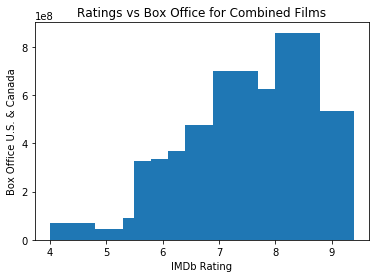

In [12]:
#Might have to run this twice to display the barchart
from matplotlib import pyplot as plt
def create_barchart(x, y, title, x_label, y_label):
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
create_barchart(final_df['IMDb Rating'].tolist(), final_df['Box Office U.S. & Canada'].tolist(), 
                "Ratings vs Box Office for Combined Films", "IMDb Rating", "Box Office U.S. & Canada")

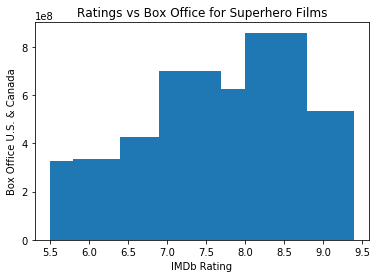

In [12]:
create_barchart(superhero_df['IMDb Rating'].tolist(), superhero_df['Box Office U.S. & Canada'].tolist(), 
                "Ratings vs Box Office for Superhero Films", "IMDb Rating", "Box Office U.S. & Canada")


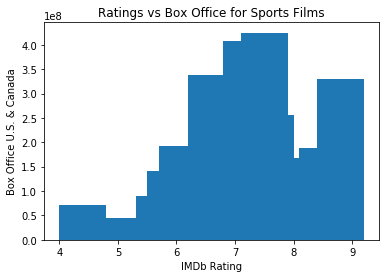

In [13]:
create_barchart(sports_df['IMDb Rating'].tolist(), sports_df['Box Office U.S. & Canada'].tolist(), 
                "Ratings vs Box Office for Sports Films", "IMDb Rating", "Box Office U.S. & Canada")


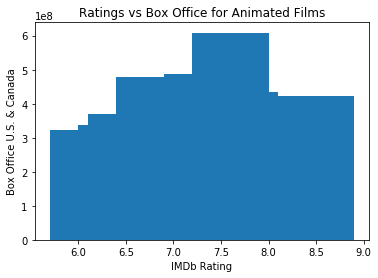

In [14]:
create_barchart(animated_df['IMDb Rating'].tolist(), animated_df['Box Office U.S. & Canada'].tolist(), 
                "Ratings vs Box Office for Animated Films", "IMDb Rating", "Box Office U.S. & Canada")


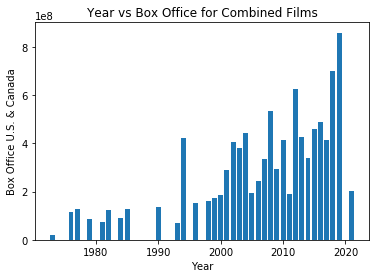

In [15]:
create_barchart(final_df['Year'].tolist(), final_df['Box Office U.S. & Canada'].tolist(), 
                "Year vs Box Office for Combined Films", "Year", "Box Office U.S. & Canada")


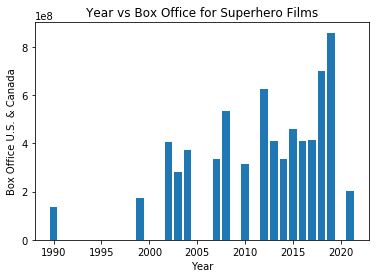

In [16]:
create_barchart(superhero_df['Year'].tolist(), superhero_df['Box Office U.S. & Canada'].tolist(), 
                "Year vs Box Office for Superhero Films", "Year", "Box Office U.S. & Canada")


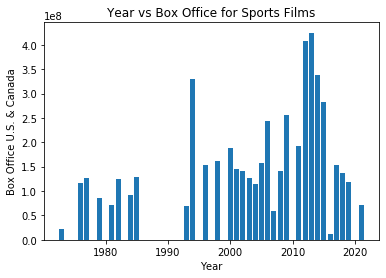

In [17]:
create_barchart(sports_df['Year'].tolist(), sports_df['Box Office U.S. & Canada'].tolist(), 
                "Year vs Box Office for Sports Films", "Year", "Box Office U.S. & Canada")


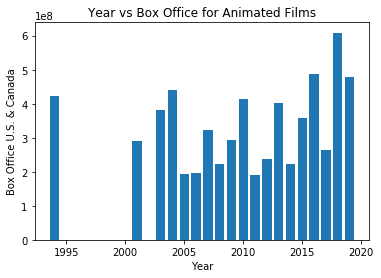

In [18]:
create_barchart(animated_df['Year'].tolist(), animated_df['Box Office U.S. & Canada'].tolist(), 
                "Year vs Box Office for Animated Films", "Year", "Box Office U.S. & Canada")
